In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np

In [7]:
import matplotlib 
import matplotlib.pyplot as plt
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [17]:
FullOrthoDF =  pd.read_pickle('../data/FullOrthologDF_20240930')
FullOrthoDF

,SpeciesName,Seq,Length,WxxLF_loc,SmoothedActivites,LinearCharge,LinearHydrophobicityKD,SmoothedActivitesLoess
0,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQA...,2928,1006,"[50849.75653537431, 50849.75653537431, 50849.7...","[0.0, 0.0, 0.2, 0.0, 0.0, 0.0, -0.2, 0.0, 0.2,...","[0.0, 0.0, 0.6666666666666666, 0.5466666666666...","[34049.34344014826, 34049.34344014826, 34049.3..."
1,Sordariomycetes_jgi|Acral2|2027520|fgenesh1_pg...,MWLVVRAGPSPLLQDLAARCHIDGMSMPLLHFDPPDFPLTGVALGI...,455,327,"[50311.68363475637, 50311.68363475637, 50311.6...","[0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, ...","[0.0, 0.0, 0.7933333333333333, 0.6511111111111...","[58366.833469168625, 58366.833469168625, 58366..."
2,Sordariomycetes_jgi|Acral2|2034848|fgenesh1_kg...,MSITELDDFTGFEGGASTAYSSPGAPAVFDLPGASNHVGTISPQDL...,222,94,"[64062.654182288825, 64062.654182288825, 75414...","[0.0, 0.0, -0.2, -0.2, -0.4, -0.6, -0.6, -0.4,...","[0.0, 0.0, 0.5311111111111111, 0.5733333333333...","[36846.26635132608, 36846.26635132608, 36846.2..."
3,Sordariomycetes_jgi|Acral2|2034849|fgenesh1_kg...,MSITGNYNQHFGAAGIISSHNYVLSELDDFTGFEGGASTAYSSPGA...,243,115,"[103421.45065118768, 103421.45065118768, 10342...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.6, 0.48, 0.4688888888888889, 0.29...","[98417.43715391349, 98417.43715391349, 98417.4..."
5,Sordariomycetes_jgi|Acral2|2047914|estExt_Gene...,MADTCGGSTPLKNFSQYGSQDRSLQQDRVVHGFHGSAAAGPSTFRS...,2943,1021,"[49761.33963354764, 49761.33963354764, 49761.3...","[0.0, 0.0, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.5444444444444445, 0.4933333333333...","[36959.46539862907, 36959.46539862907, 36959.4..."
...,...,...,...,...,...,...,...,...
1207,Cimm_XP_012214147.1_CoccidioidesImmitisRS,MSTSNLPLDIGTLLDLSTDQFVEDLGSSSHSSLLDQDQLDQLINFN...,242,108,"[179044.502422884, 179044.502422884, 179044.50...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0....","[0.0, 0.0, 0.4133333333333334, 0.4555555555555...","[215199.18805174268, 215199.18805174268, 21519..."
1208,Cpos_XP_003070205.1_CoccidioidesPosadasiiC735,MSTSNLPLGMVSLSASAVRLVANQRPDIGTLLDLSTDQYVEDLGSS...,260,126,"[56309.23879651313, 56309.23879651313, 56309.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.4133333333333334, 0.4555555555555...","[6138.0, 6138.0, 6138.0, 6138.0, 6138.0, 6138...."
1209,Mory_EHA48851.1_MagnaportheOryzae70_15,MNNTSDLGLDDFTAFGGGASAFPSPAMPGVFDIASTTASTMGTVSP...,239,101,"[165405.40017749005, 165405.40017749005, 16540...","[0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.4, ...","[0.0, 0.0, 0.3533333333333334, 0.2333333333333...","[156903.4915015713, 156903.4915015713, 156903...."
1210,Nfis_EAW24893.1_NeosartoryaFischeriNRRL181,MSTPNIAQDMPDFFGLPSNDFGDDFELSTEPTMLSPNQIPTGLMAV...,251,109,"[148604.20780984958, 148604.20780984958, 14860...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0....","[0.0, 0.0, 0.39555555555555555, 0.453333333333...","[177960.75802414527, 177960.75802414527, 17796..."


In [18]:
FullOrthoDF["WxxLF"] = [len(re.findall("W..LF", seq)) for seq in FullOrthoDF["Seq"]]
FullOrthoDF["FF"] = [len(re.findall("FF", seq)) for seq in FullOrthoDF["Seq"]]
FullOrthoDF["FxF"] = [len(re.findall("F.F", seq)) for seq in FullOrthoDF["Seq"]]
FullOrthoDF["FxxF"] = [len(re.findall("F..F", seq)) for seq in FullOrthoDF["Seq"]]
FullOrthoDF["FxxxxxxF"] = [len(re.findall("F......F", seq)) for seq in FullOrthoDF["Seq"]]
FullOrthoDF["MFxYxxL"] = [len(re.findall("MF.Y..L", seq)) for seq in FullOrthoDF["Seq"]]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


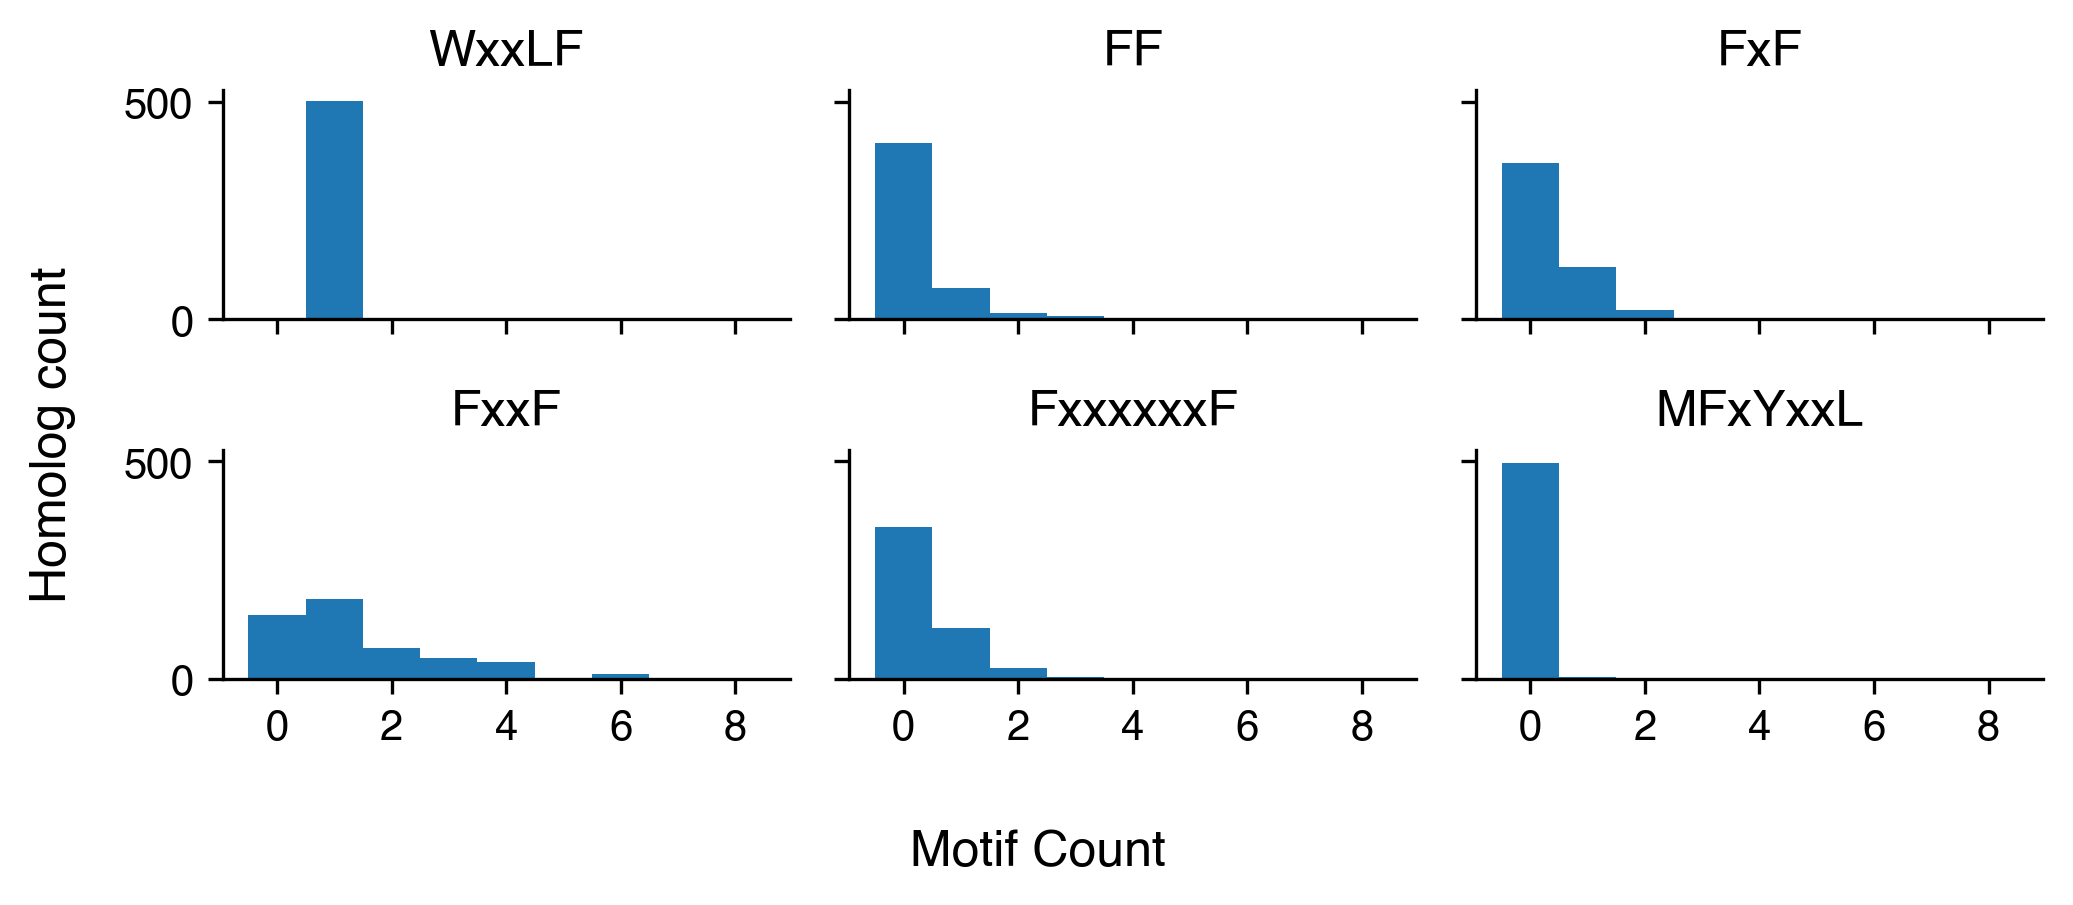

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(7,3), sharey=True, sharex=True)
bins = np.arange(-0.5, 8.8, 1)

axs[0, 0].hist(FullOrthoDF["WxxLF"], bins=bins)
axs[0, 0].set_title("WxxLF")
axs[0, 1].hist(FullOrthoDF["FF"], bins=bins)
axs[0, 1].set_title("FF")
axs[0, 2].hist(FullOrthoDF["FxF"], bins=bins)
axs[0, 2].set_title("FxF")
axs[1, 0].hist(FullOrthoDF["FxxF"], bins=bins)
axs[1, 0].set_title("FxxF")
axs[1, 1].hist(FullOrthoDF["FxxxxxxF"], bins=bins)
axs[1, 1].set_title("FxxxxxxF") # FxxxxxxF
axs[1, 2].hist(FullOrthoDF["MFxYxxL"], bins=bins)
axs[1, 2].set_title("MFxYxxL")

fig.supxlabel("Motif Count")
fig.supylabel("Homolog count")
sns.despine()

axs[0, 0].set_xticks([0, 2, 4, 6, 8])
fig.tight_layout()

plt.savefig("../figures/full_length_motif_counts.pdf", format='pdf', bbox_inches='tight' )

# Count motifs in Y1000+

In [12]:
def read_fasta(file):
    with open(file) as f:
        lines = f.readlines()

    names = []
    seqs = []
    seq = ""
    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">", ""))
            if len(names) > 1:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()
    seqs.append(seq)

    return pd.DataFrame({'name' : names, 'Seq' : seqs})

In [13]:
y1000_homologs = read_fasta("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/saccharmycotina_TFs/Gcn4/Gcn4_orthologs.fasta")

In [14]:
y1000_homologs["WxxLF"] = [len(re.findall("W..LF", seq)) for seq in y1000_homologs["Seq"]]
y1000_homologs["FF"] = [len(re.findall("FF", seq)) for seq in y1000_homologs["Seq"]]
y1000_homologs["FxF"] = [len(re.findall("F.F", seq)) for seq in y1000_homologs["Seq"]]
y1000_homologs["FxxF"] = [len(re.findall("F..F", seq)) for seq in y1000_homologs["Seq"]]
y1000_homologs["FxxxxxxF"] = [len(re.findall("F......F", seq)) for seq in y1000_homologs["Seq"]]
y1000_homologs["MFxYxxL"] = [len(re.findall("MF.Y..L", seq)) for seq in y1000_homologs["Seq"]]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


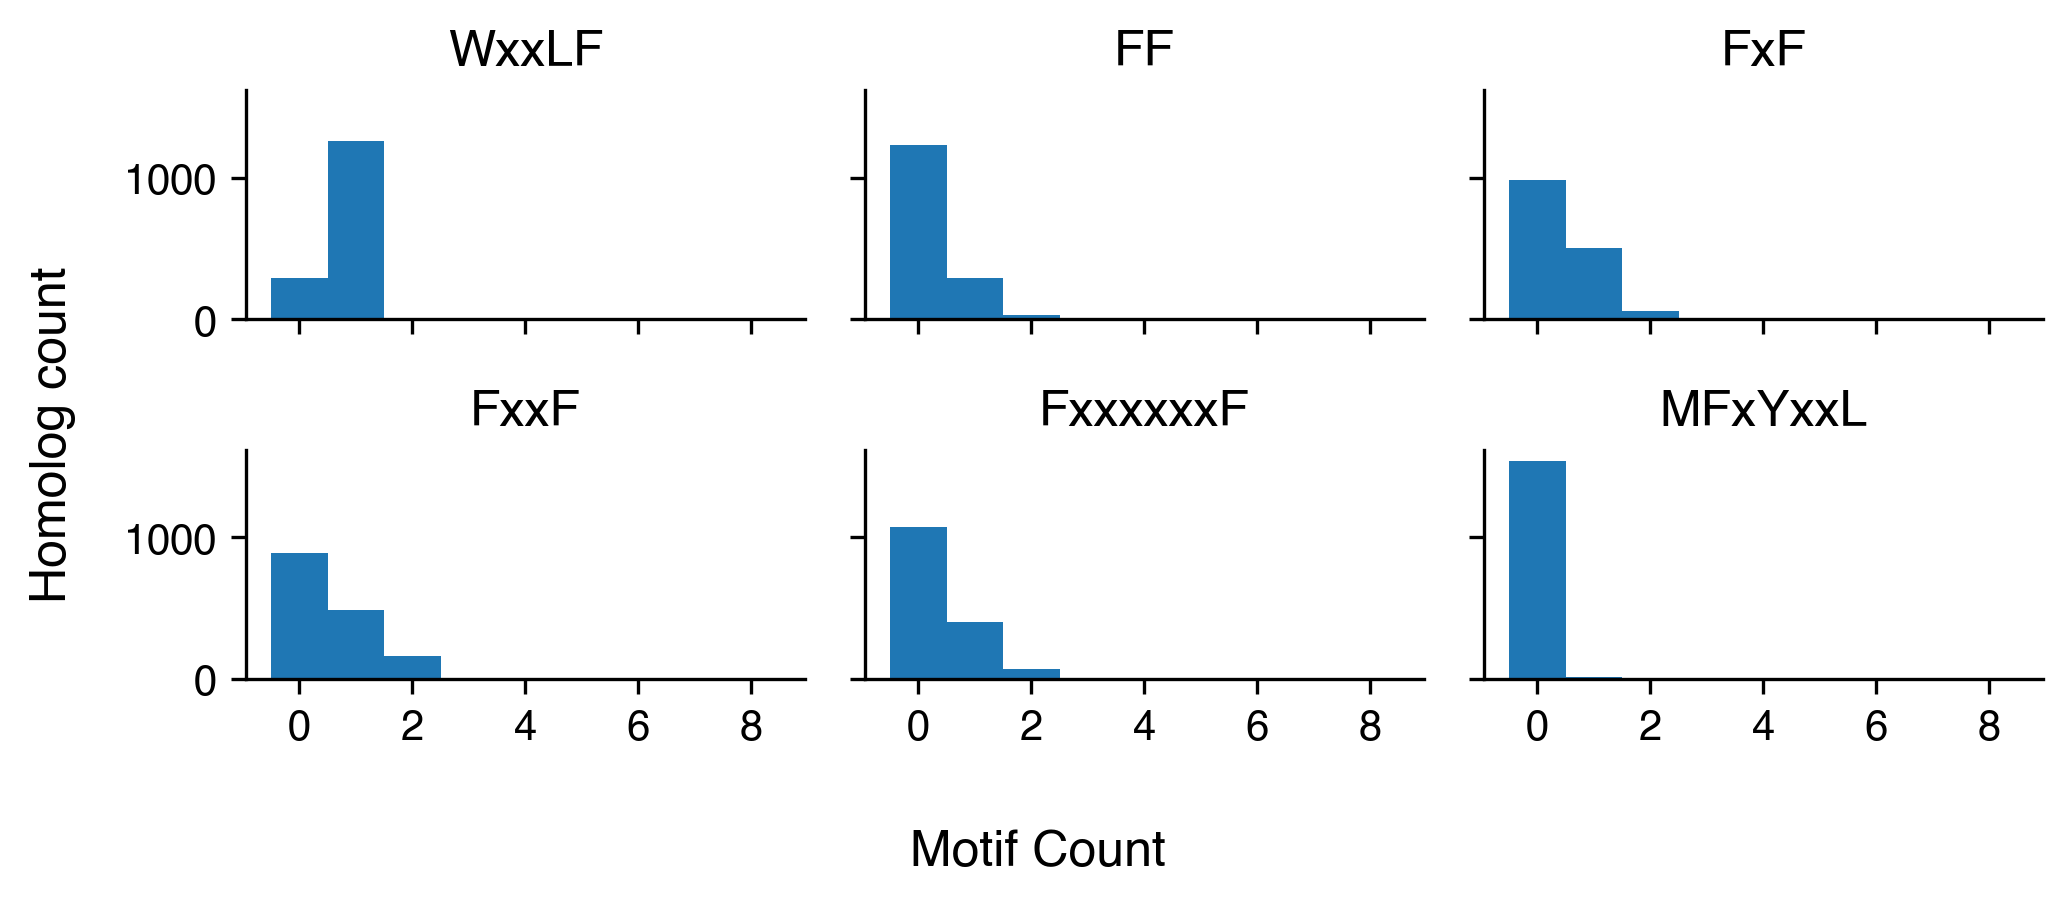

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(7,3), sharey=True, sharex=True)
bins = np.arange(-0.5, 8.8, 1)

axs[0, 0].hist(y1000_homologs["WxxLF"], bins=bins)
axs[0, 0].set_title("WxxLF")
axs[0, 1].hist(y1000_homologs["FF"], bins=bins)
axs[0, 1].set_title("FF")
axs[0, 2].hist(y1000_homologs["FxF"], bins=bins)
axs[0, 2].set_title("FxF")
axs[1, 0].hist(y1000_homologs["FxxF"], bins=bins)
axs[1, 0].set_title("FxxF")
axs[1, 1].hist(y1000_homologs["FxxxxxxF"], bins=bins)
axs[1, 1].set_title("FxxxxxxF") # FxxxxxxF
axs[1, 2].hist(y1000_homologs["MFxYxxL"], bins=bins)
axs[1, 2].set_title("MFxYxxL")

fig.supxlabel("Motif Count")
fig.supylabel("Homolog count")
sns.despine()

axs[0, 0].set_xticks([0, 2, 4, 6, 8])
fig.tight_layout()

plt.savefig("../figures/y1000_full_length_motif_counts.pdf", format='pdf', bbox_inches='tight' )

In [29]:
max(FullOrthoDF["FF"])

8

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


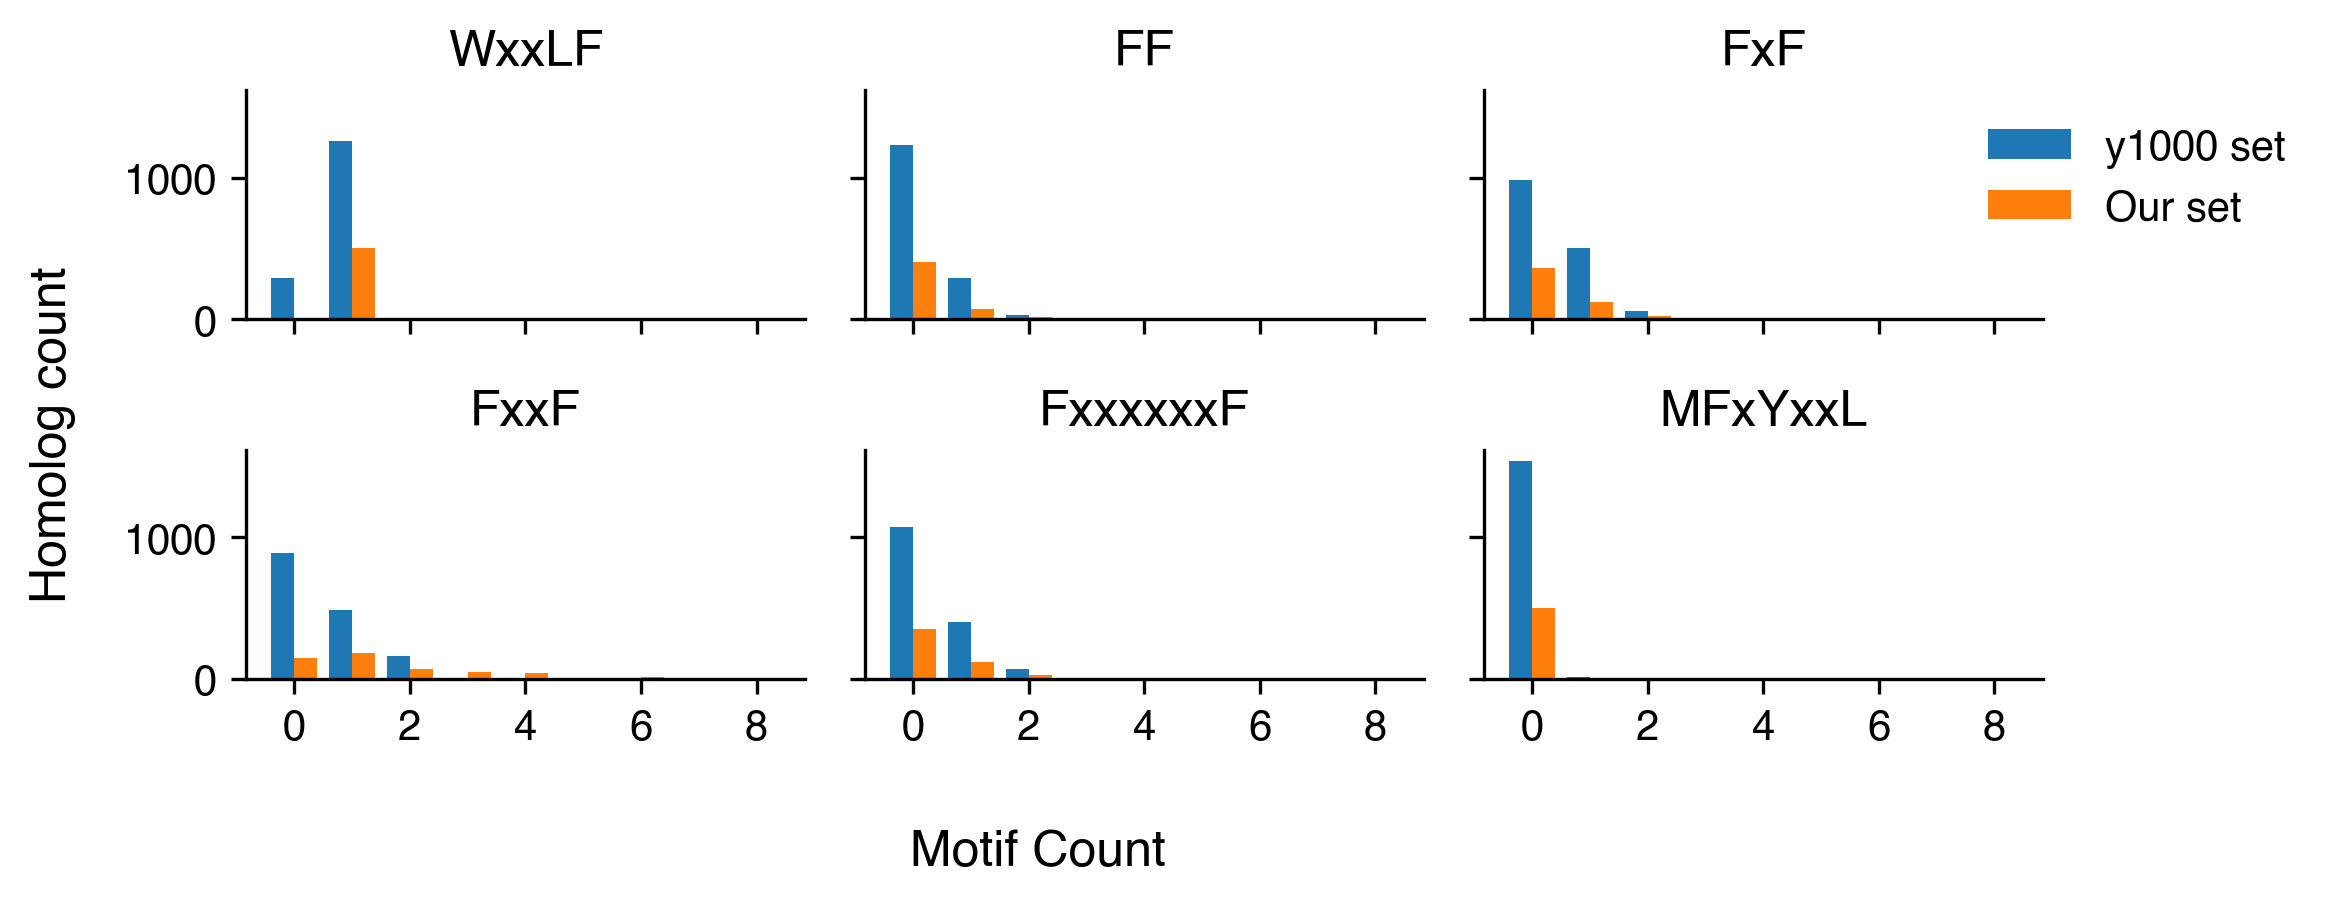

In [50]:
fig, axs = plt.subplots(2, 3, figsize=(7,3), sharey=True, sharex=True)
bins = np.arange(-0.5, 8.8, 1)

axs[0, 0].hist([y1000_homologs["WxxLF"],FullOrthoDF["WxxLF"]] , bins=bins)
axs[0, 0].set_title("WxxLF")
axs[0, 1].hist([y1000_homologs["FF"], FullOrthoDF["FF"]], bins=bins)
axs[0, 1].set_title("FF")
axs[0, 2].hist([y1000_homologs["FxF"], FullOrthoDF["FxF"]], bins=bins, label=["y1000 set", "Our set"])
axs[0, 2].set_title("FxF")
axs[1, 0].hist([y1000_homologs["FxxF"], FullOrthoDF["FxxF"]], bins=bins)
axs[1, 0].set_title("FxxF")
axs[1, 1].hist([y1000_homologs["FxxxxxxF"], FullOrthoDF["FxxxxxxF"]], bins=bins)
axs[1, 1].set_title("FxxxxxxF") # FxxxxxxF
axs[1, 2].hist([y1000_homologs["MFxYxxL"], FullOrthoDF["MFxYxxL"]], bins=bins)
axs[1, 2].set_title("MFxYxxL")

fig.supxlabel("Motif Count")
fig.supylabel("Homolog count")
sns.despine()

axs[0, 0].set_xticks([0, 2, 4, 6, 8])
fig.tight_layout()
axs[0, 2].legend(frameon=False, bbox_to_anchor=(1.5,1))

plt.savefig("../figures/y1000_mycosom_full_length_motif_counts.pdf", format='pdf', bbox_inches='tight' )

# Look at motifs in sequence alignments --> Make them a logo plot

In [29]:
import gzip, logomaker, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, protfasta

In [30]:
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_white = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#FFFFFF"
}

def make_alignment_conservation_plot(alignment_file, output_file, remove_gaps=False):
    """
    Function to make alignment conservation plots.
    
    alignment_file: Input alignment file
    output_file: Where to save the image
    remove_gaps: Whether or not to remove positions that are over 90% gaps 
    """
    with open(alignment_file, "r") as f:
        lines = f.readlines()

    names = []
    seqs = []
    seq = ""

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">",""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq)

    amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L', '-']

    # Each sequence position gets an dictionary is the list
    amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

    for seq in seqs: 
        for i, aa in enumerate(seq): 
            amino_acid_dicts[i][aa] += 1
    
    if remove_gaps: 
        filtered_aa_dict = []
        for aa_d in amino_acid_dicts:
            if aa_d['-'] < len(seqs) * .90:
                filtered_aa_dict.append(aa_d)
        amino_acid_dicts = filtered_aa_dict

    from matplotlib.lines import Line2D
    fig, ax = plt.subplots(figsize=(20,6))

    for i, count_dict in enumerate(amino_acid_dicts): 
        bottom = 0
        for aa, count in count_dict.items():
            p = ax.bar(i, count/len(seqs), label=aa, bottom=bottom, color = amino_acid_colors_white[aa])
            bottom += count/len(seqs)

    ax.set_xlabel("Alignment position", size=20)
    ax.set_ylabel("Percent of sequences", size=20)
    
    ax.spines[['right', 'top']].set_visible(False)

    custom_lines = []

    for color in list(amino_acid_colors_white.values()):
        custom_lines.append(Line2D([0], [0], color=color, lw=2))

    ax.legend(custom_lines, list(amino_acid_colors_white.keys()), bbox_to_anchor=(1.05, 0.95), fontsize=10)
    plt.tight_layout()
    plt.savefig(output_file)

In [31]:
# Create a function that takes in a fasta file containing a multiple sequence alignment (MSA),
# a coloring scheme for each amino acid, the start and stop positions in the amino acid MSA (for the
# range that the LogoMaker covers), the x-axis tick spacing, and the width and height values for logo
def DrawLogo(alignment_file, AA_color_scheme, start_position, end_position, x_axis_tick_space, figure_width = 16, figure_height = 4):

    # Read in fasta file
    fasta_file = protfasta.read_fasta(alignment_file, invalid_sequence_action = 'ignore', alignment = True, expect_unique_header = False)

    # Convert the alignment into a dataframe
    fasta_file = pd.DataFrame(fasta_file.items(), columns = ['Name', 'Sequence'])

    # Extract the protein sequences only and split each character in the alignment into multiple different columns
    ManyColumnsDF = fasta_file['Sequence'].str.split('', expand=True)

    # Create an empty dataframe
    PercentIdentityDF = pd.DataFrame()

    # Create a for loop that updates the amino acid percent identities in each position of the sequence alignment
    for column in ManyColumnsDF.loc[:, start_position:end_position + 1].columns:
        AAs = ManyColumnsDF[column].value_counts()
        #Create a dictionary with all of the amino acid percent identities initialized to 0
        AA_dict = {'A':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0, 'K':0, 'L':0, 'M':0, 'N':0, 'P':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'V':0, 'W':0, 'Y':0}
        # Iterate though each amino acid present in the column and match it with its key in the dict
        for AA in AAs.index.tolist():   # 'AAs.index.tolist()' finds unique amino acids that are present
            for key in AA_dict:         # in a position in the alignment. It then adds them once to a list
                if key == AA:
                    #After matching an amino acid to its key, the value count of the amino acid is used
                    # to calculate the percent identity of an amino acid in a specific position in the alignment
                    AA_dict[key] = AA_dict[key] + round(AAs[AA]/sum(AAs.values.tolist()) * 100)
                    PID_DF2 = pd.DataFrame(list(AA_dict.items()), columns = ['AA Code', column]).set_index('AA Code')
                    PercentIdentityDF[column] = PID_DF2[column]
                else:
                    continue

    # Take a specific section from the protein MSA
    TransposedDF = PercentIdentityDF.transpose()
    
    # Create a logomaker Logo object
    logo = logomaker.Logo(TransposedDF, color_scheme = AA_color_scheme, figsize=(figure_width, figure_height))

    # Remove black lines bordering LogoMaker plot
    logo.style_spines(visible = False)
    
    # Adjust the tick marks and the labels for the x and y axes
    logo.ax.set_xticks(range(start_position, end_position + 1, x_axis_tick_space))
    logo.ax.set_yticks(range(0, 110, 10))
    logo.ax.set_xlabel('MSA Position')
    logo.ax.set_ylabel('Percent Identity')
    
    # Add black lines (spines) on the x and y axes
    logo.style_spines(spines=['bottom', 'left'], visible = True)

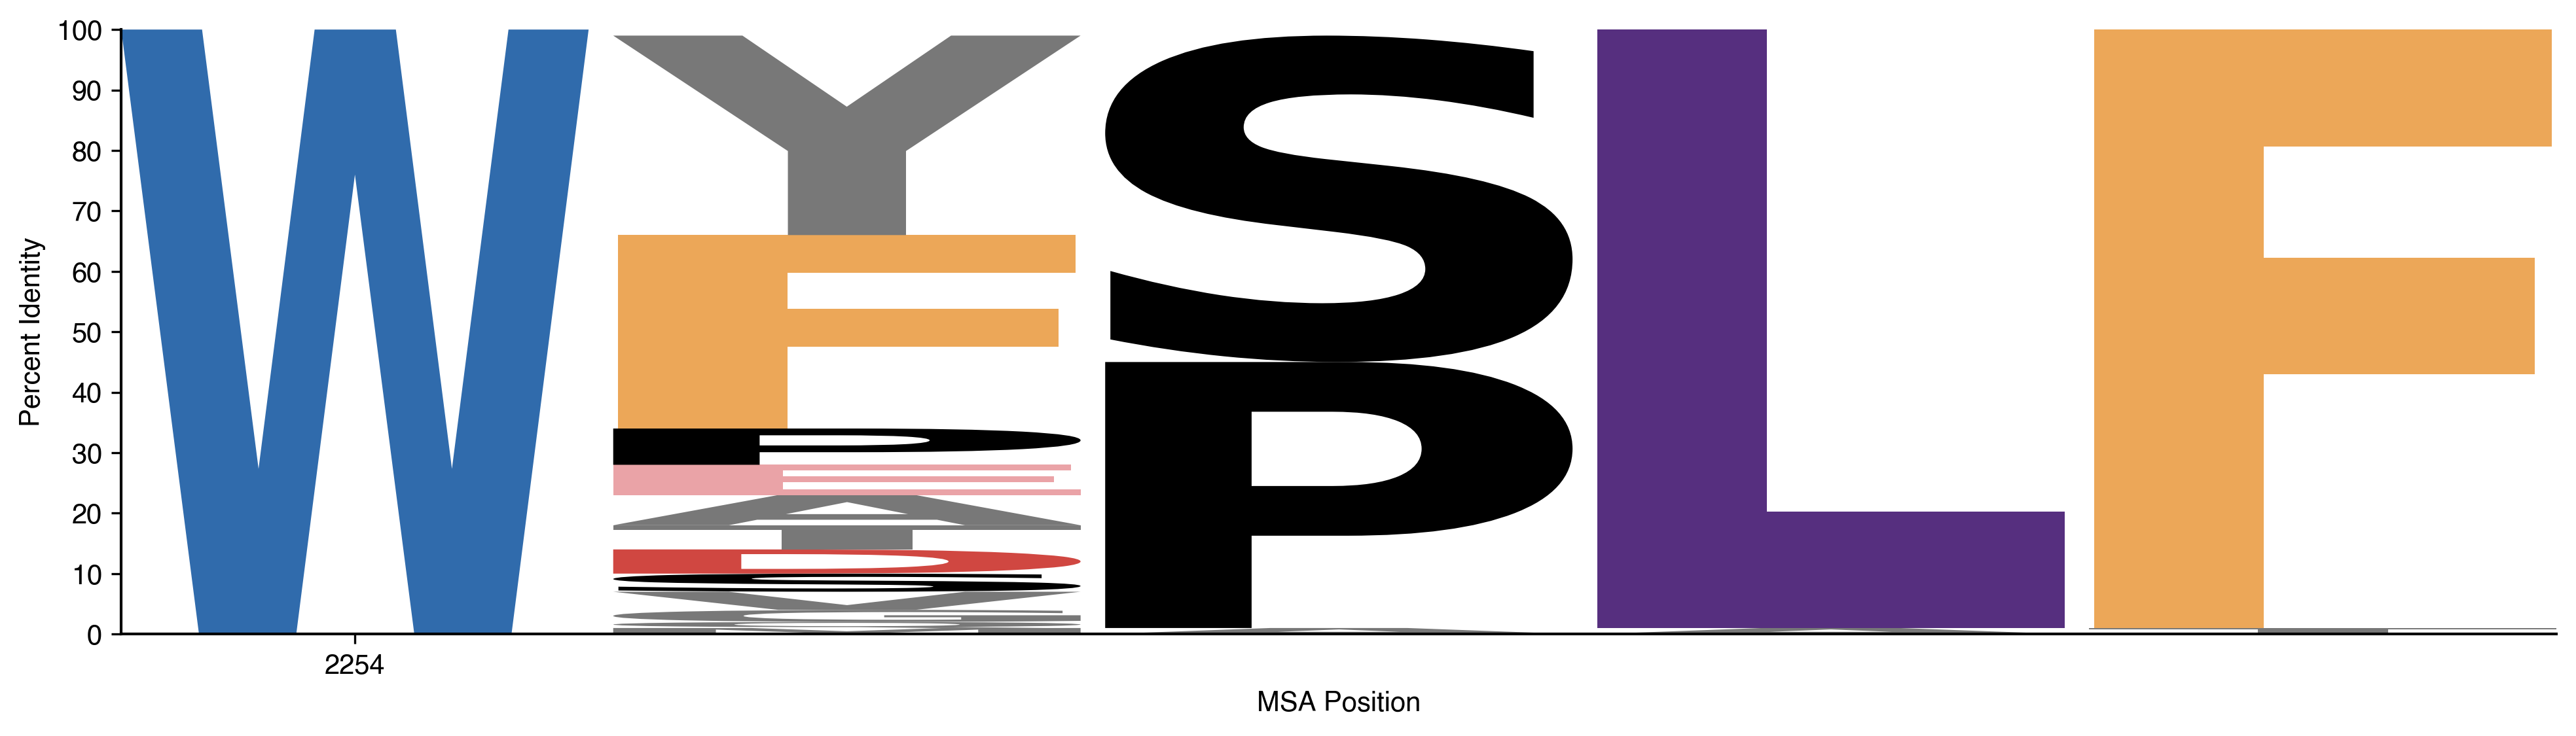

In [32]:
# Function to make web logos
DrawLogo(
    alignment_file = "../data/fasta_files/Table_S2_500YeastGcn4Alignment.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 2254,  # Be careful with start/end positions;
    end_position = 2257,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)

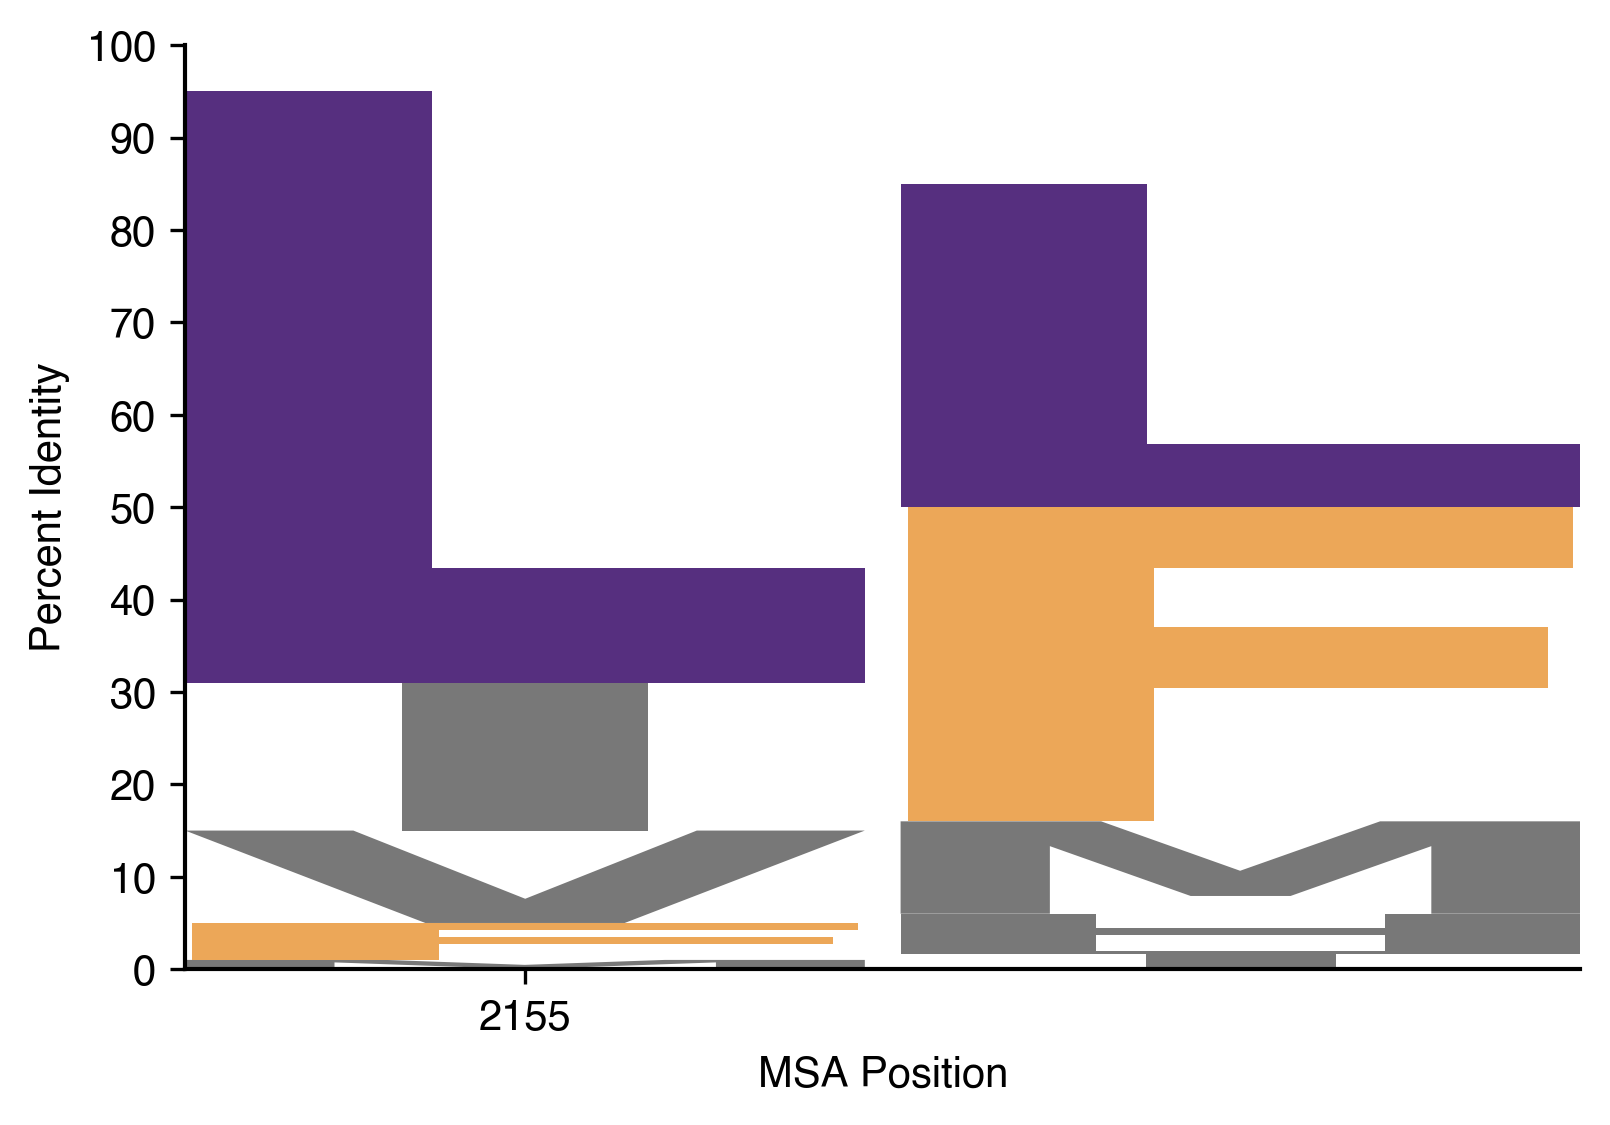

In [33]:
# Function to make web logos
DrawLogo(
    alignment_file = "../data/fasta_files/Table_S2_500YeastGcn4Alignment.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 2155,  # Be careful with start/end positions;
    end_position = 2155,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 6,
    figure_height = 4
)

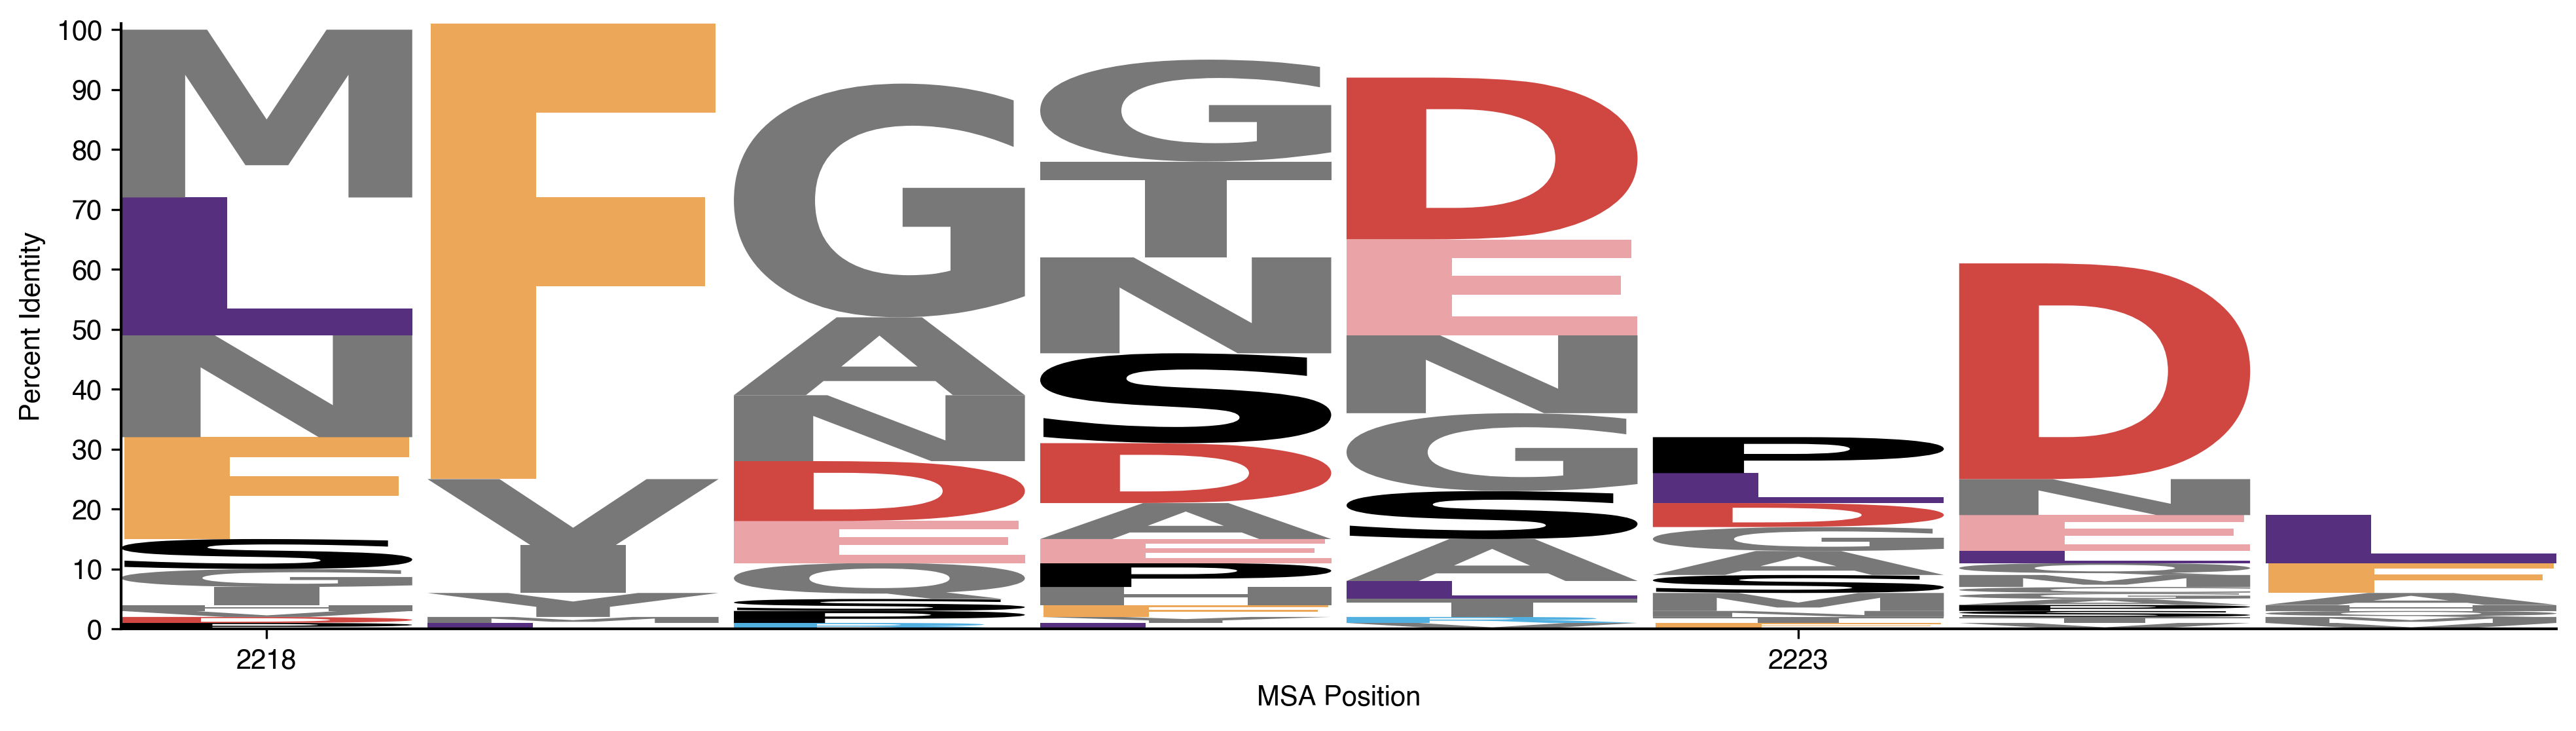

In [34]:
# Function to make web logos
DrawLogo(
    alignment_file = "../data/fasta_files/Table_S2_500YeastGcn4Alignment.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 2218,  # Be careful with start/end positions;
    end_position = 2224,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)

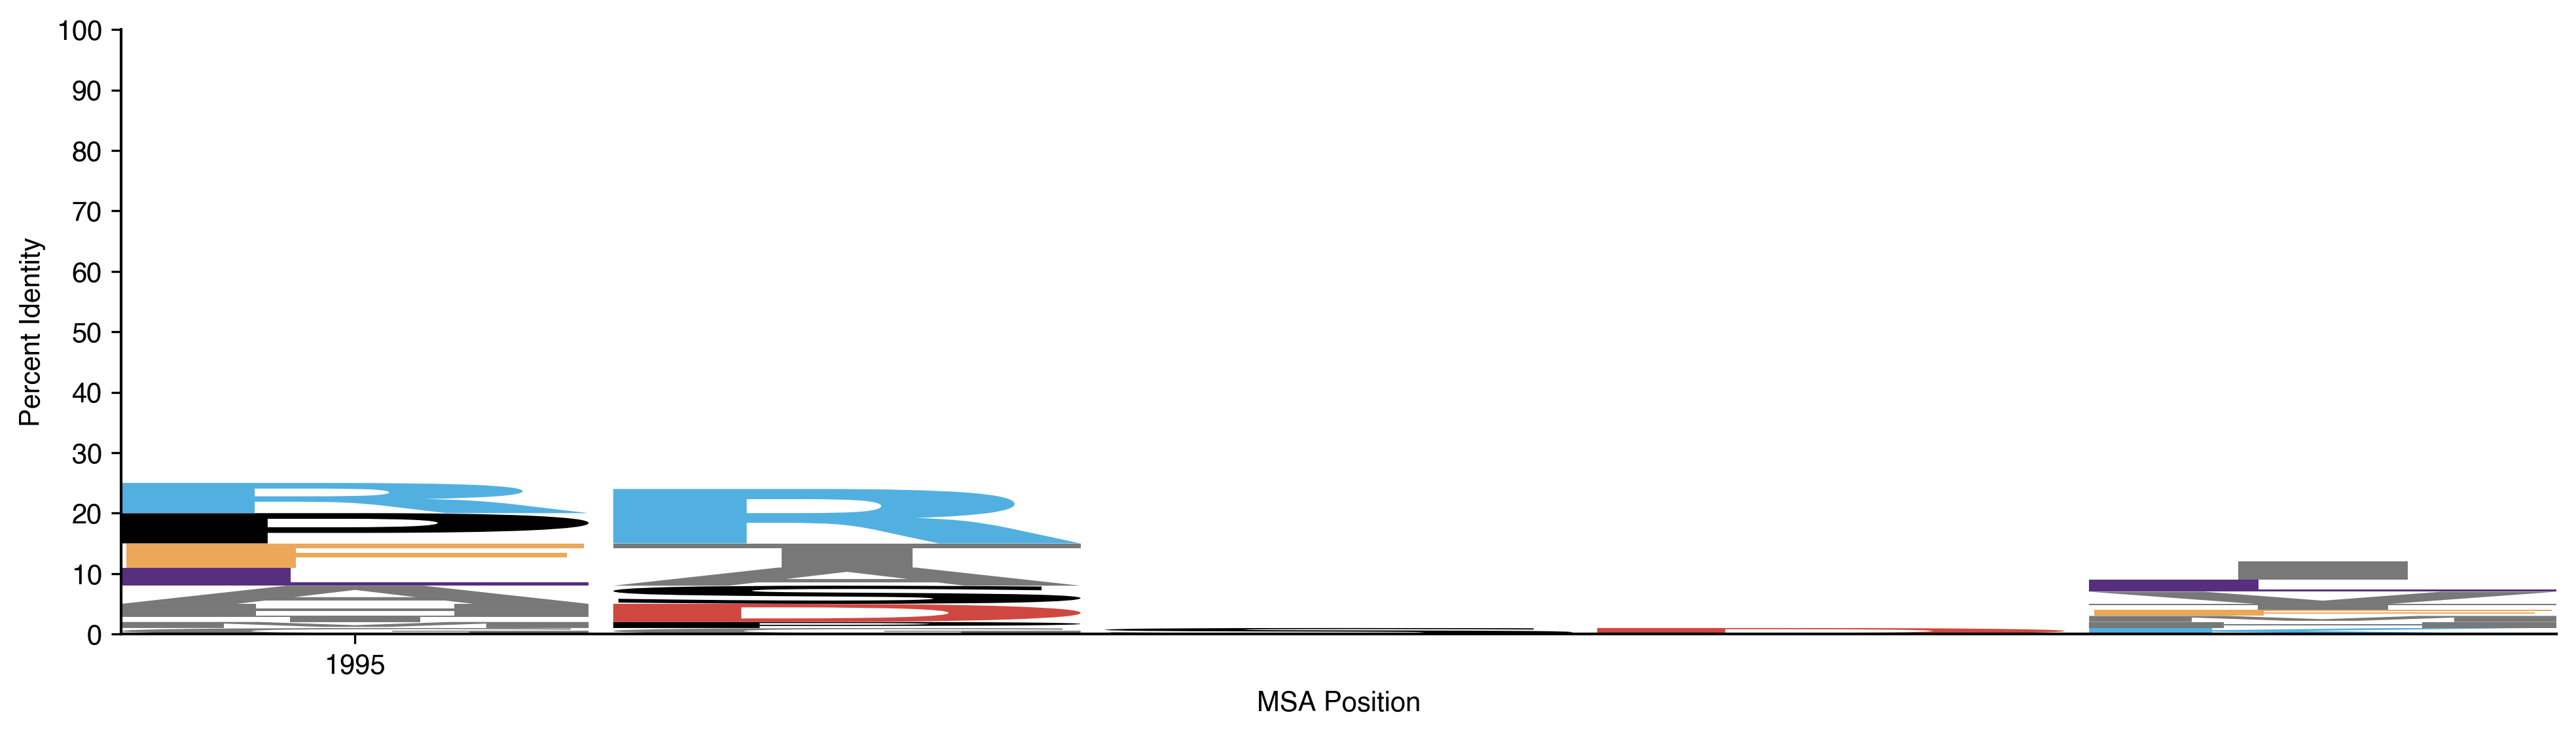

In [35]:
# FxF motif
DrawLogo(
    alignment_file = "../data/fasta_files/Table_S2_500YeastGcn4Alignment.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1995,  # Be careful with start/end positions;
    end_position = 1998,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)

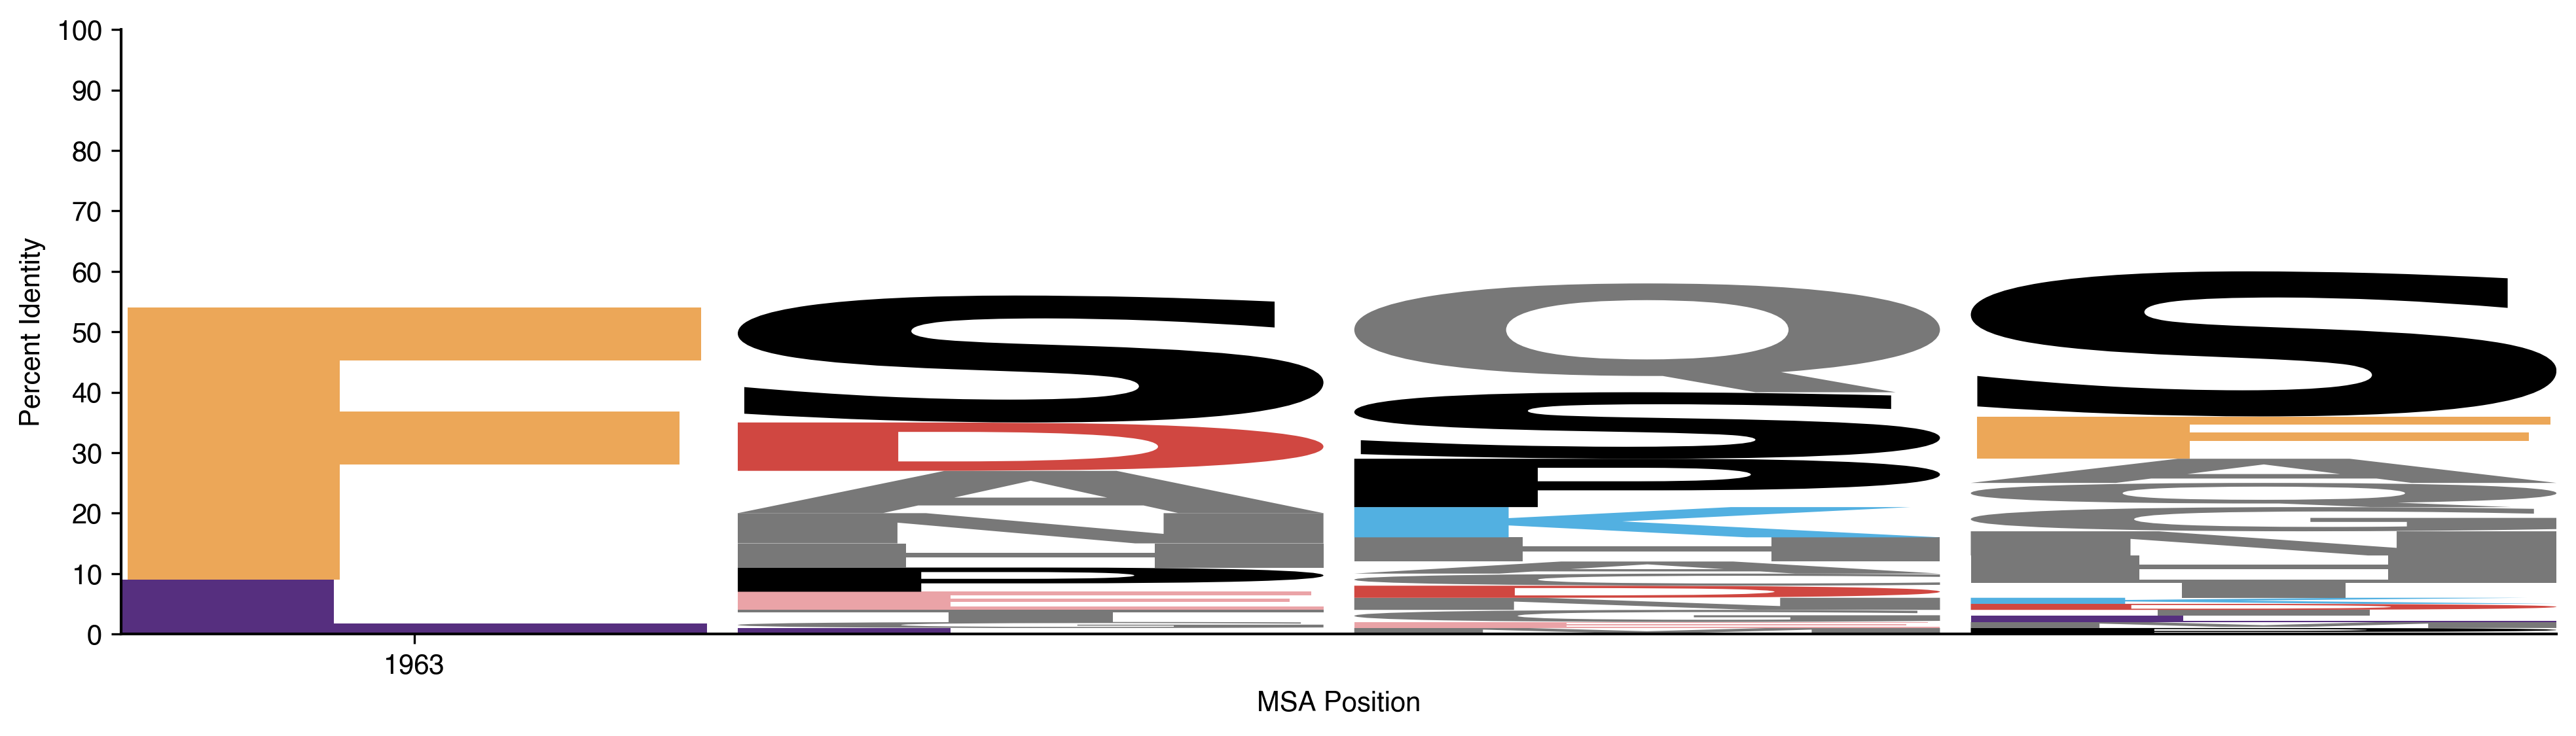

In [36]:
# FxxF motif
DrawLogo(
    alignment_file = "../data/fasta_files/Table_S2_500YeastGcn4Alignment.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1963,  # Be careful with start/end positions;
    end_position = 1965,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)

/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_67951/4108224518.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PercentIdentityDF[column] = PID_DF2[column]
/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_67951/4108224518.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PercentIdentityDF[column] = PID_DF2[column]
/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_67951/4108224518.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

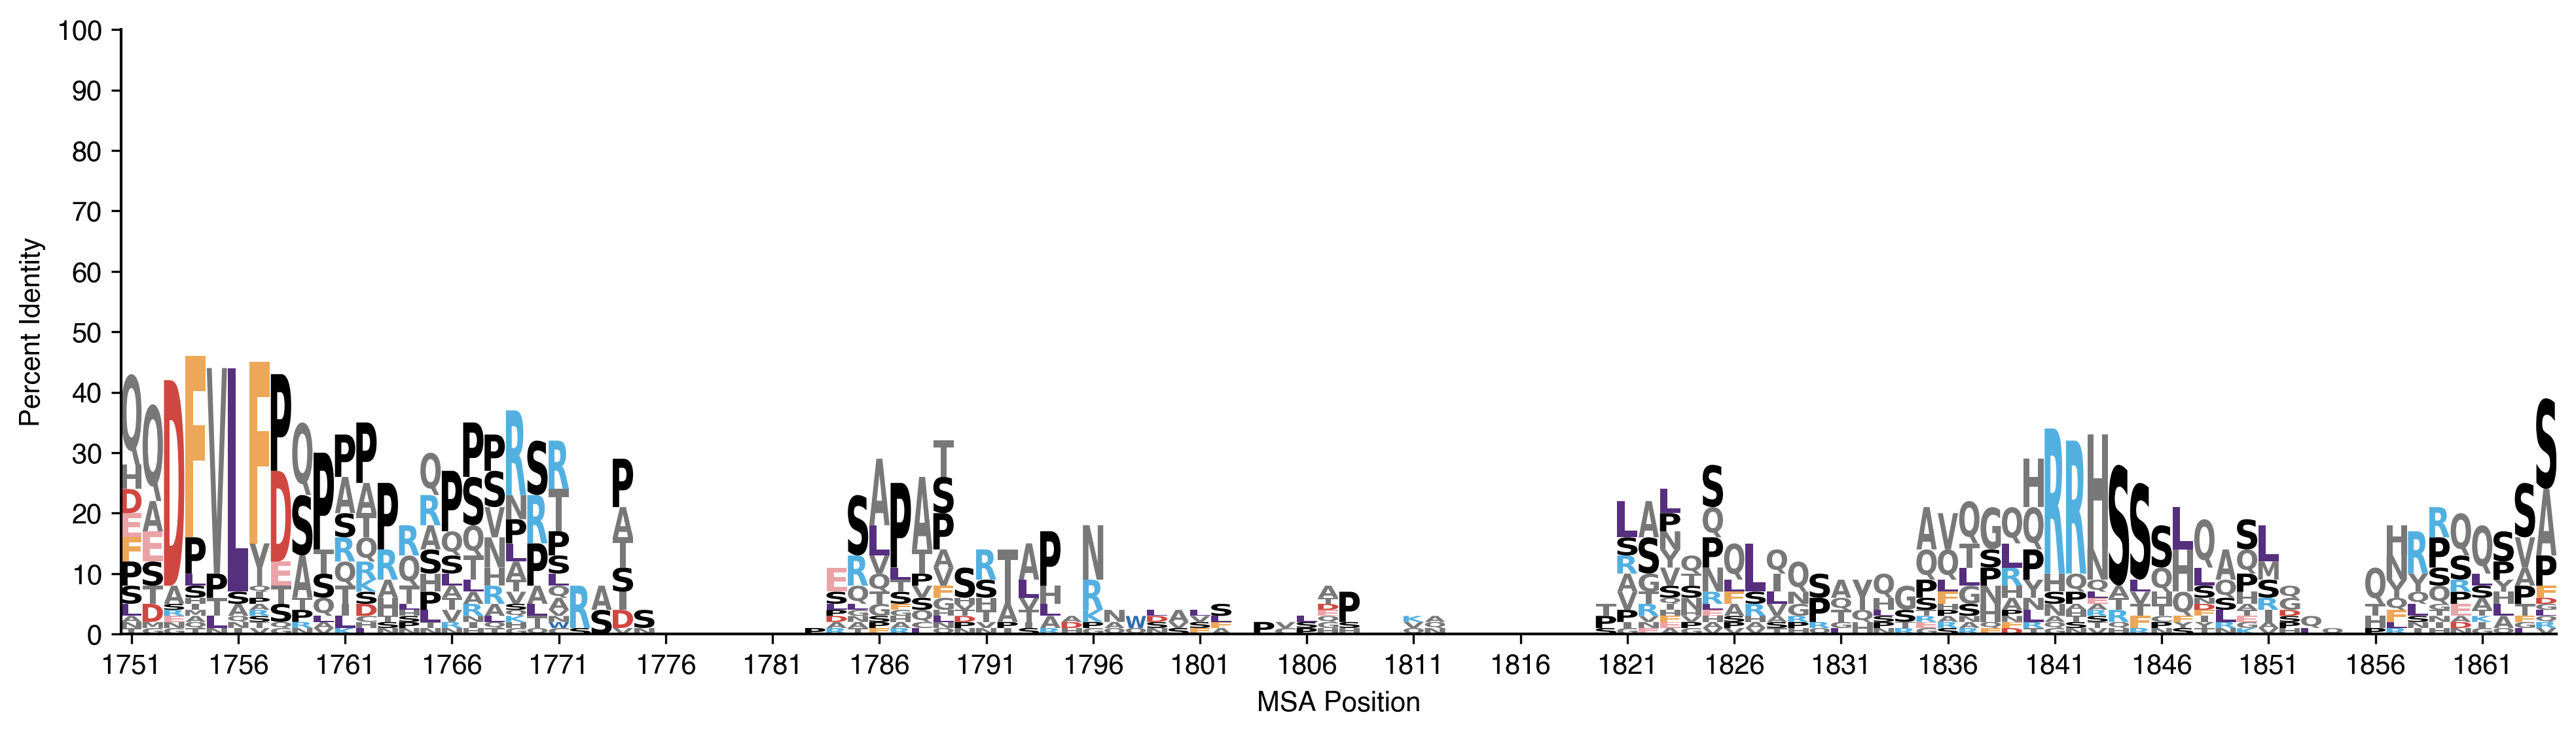

In [37]:
# FxxxxxxF motif
DrawLogo(
    alignment_file = "../data/fasta_files/Table_S2_500YeastGcn4Alignment.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1751,  # Be careful with start/end positions;
    end_position = 1863,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)